In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df_train=pd.read_csv('flight_train.csv', error_bad_lines = False)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Pre-Precessing

In [3]:
# read the first 5 values 
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Thus we observe that all the attributes except price are object values whereas price is int value.Hence all the object values need to be convertod to either float or integer value for visualization.

In [6]:
# finding the nan values
df_train = pd.DataFrame(data = df_train) # converting the data set to the dataframe
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Thus we observe that there are two missing values in the data set

In [7]:
df_train.mean()

Price    9087.064121
dtype: float64

In [8]:
df_train.dropna(inplace = True)
df_train.shape

(10682, 11)

In [9]:
# replacing all the null values with the mean
df_train.fillna(df_train.mean(), inplace = True)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df_train.isna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


Thus we observe that all the missing values have been replaced by the mean value.

#### Converting object value to numeric values.

In [12]:
# extracting values from date_of_journey
df_train["Journey_day"] = pd.to_datetime(df_train['Date_of_Journey'],format="%d/%m/%Y").dt.day
df_train["Journey_month"] = pd.to_datetime(df_train['Date_of_Journey'], format= "%d/%m/%Y").dt.month
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


As these are object values the model wont be able to understand them, but these are required for the preddiction process.

Now the date of journey is converted to integer and we can drop it now.

In [13]:

 df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [14]:
# Similar to Date_of_Journey we can extract values from Dep_Time

#Extracting hours
df_train["Departure_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

#Extracting ,minutes
df_train["Departure_min"]=pd.to_datetime(df_train["Dep_Time"]).dt.minute

#Now we can drop Dep_Time as it is of no use
df_train.drop(['Dep_Time'],axis=1, inplace=True)



In [15]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Date_of_journey and Dep_time columns have been removed.

In [16]:
# getting numerical values from arrival_time
df_train["Arr_hr"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arr_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)


In [17]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


The Duration column also has numerical values hence can be used.

In [18]:

# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [19]:

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [20]:
df_train.drop(["Duration"], axis = 1, inplace = True)

In [21]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Now handling categotical data 

To handle categorical data we will use ordinal encodeing technique.|

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [24]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [25]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
# label encoding airline column
labelencoder_X_1 = LabelEncoder()
Airline = df_train['Airline']
Airline = labelencoder_X_1.fit_transform(df_train['Airline'])
Airline = pd.DataFrame(data = Airline)
Airline.head()



,0
0,3
1,1
2,4
3,3
4,3


In [27]:
# label encoding source column
labelencoder_X_2 = LabelEncoder()
Source = df_train['Source']
Source = labelencoder_X_2.fit_transform(df_train['Source'])
Source = pd.DataFrame(data = Source)
Source.head()


,0
0,0
1,3
2,2
3,3
4,0


In [28]:
# label encoding destination column
labelencoder_X_3 = LabelEncoder()
Destination = df_train['Destination']
Destination = labelencoder_X_3.fit_transform(df_train['Destination'])
Destination = pd.DataFrame(data = Destination)
Destination.head()

,0
0,5
1,0
2,1
3,0
4,5


In [29]:
data_a = pd.concat([df_train, Airline, Source, Destination], axis = 1)


In [30]:
data_a.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,0,0,0
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,3.0,0.0,5.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,3.0,0.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,4.0,2.0,1.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,3.0,3.0,0.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,3.0,0.0,5.0


In [31]:
# dropping route and additional info column
data_a.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [32]:
data_a.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,0,0,0
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,3.0,0.0,5.0
1,Air India,Kolkata,Banglore,2 stops,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,3.0,0.0
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,4.0,2.0,1.0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,3.0,3.0,0.0
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,3.0,0.0,5.0


We can further encode the number of stops using label encoder.

In [33]:
data_a.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [34]:
data_a.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,0,0,0
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,3.0,0.0,5.0
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,3.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,4.0,2.0,1.0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,3.0,3.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,3.0,0.0,5.0


In [35]:
data_a.shape

(10683, 16)

## Visualization

In [36]:
# Histogram to get quick glance at the dat distribution

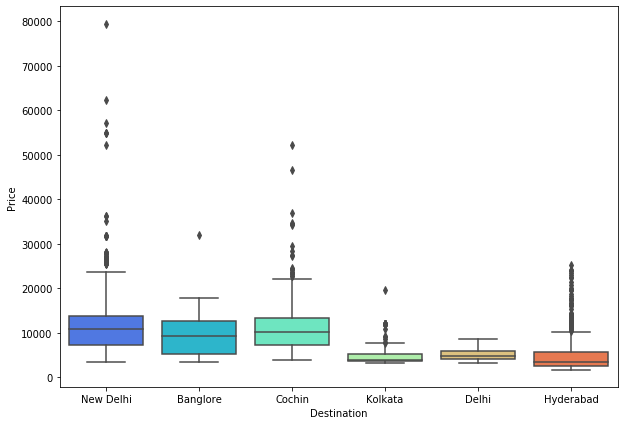

In [37]:
# boxplot between destination and the price

figure = (10,7)
fig, ax = plt.subplots(figsize=figure)
sns.boxplot(x='Destination',y='Price',data=data_a,palette='rainbow')


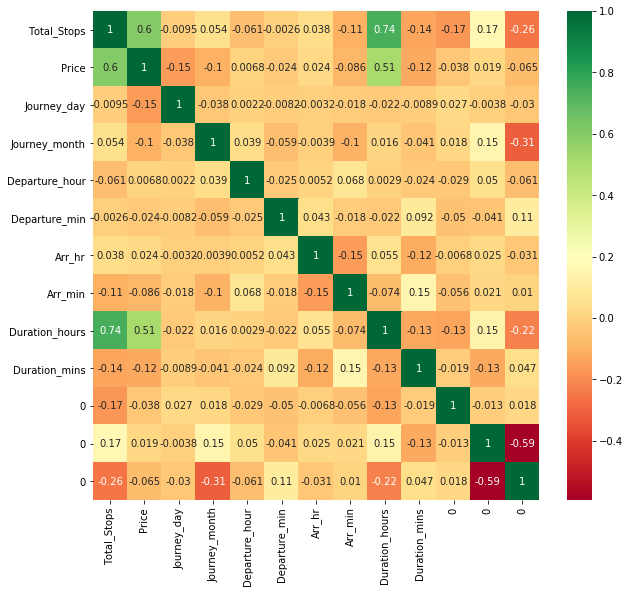

In [38]:
# plotting the correlation matrix
plt.figure(figsize = (10,9))
sns.heatmap(data_a.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [39]:
data_a.corr()

,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,0,0,0
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,-0.171285,0.171658,-0.255415
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,-0.038010,0.019252,-0.065173
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,0.026677,-0.003837,-0.029870
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,0.018415,0.152806,-0.309996
Departure_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.028897,0.049905,-0.061040
Departure_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.049570,-0.040844,0.108101
Arr_hr,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,-0.006820,0.025134,-0.030601
Arr_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,-0.056240,0.021211,0.010239
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,-0.133845,0.146173,-0.223072
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.019295,-0.125482,0.047043


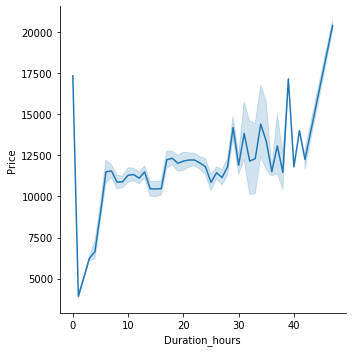

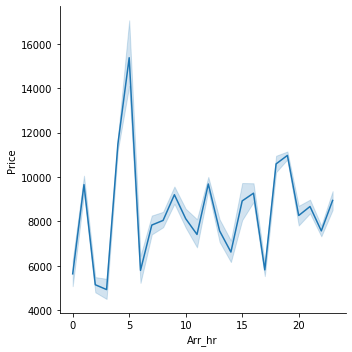

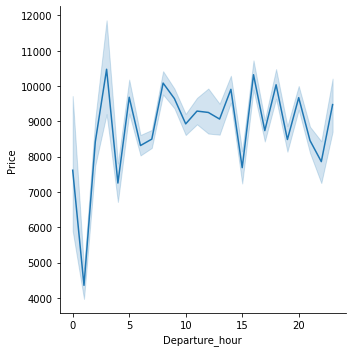

In [40]:
# plotting scatter plots

sns.relplot(x="Duration_hours", y="Price",
             
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=data_a);
sns.relplot(x="Arr_hr", y="Price",
             
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=data_a);
sns.relplot(x="Departure_hour", y="Price",
             
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=data_a);


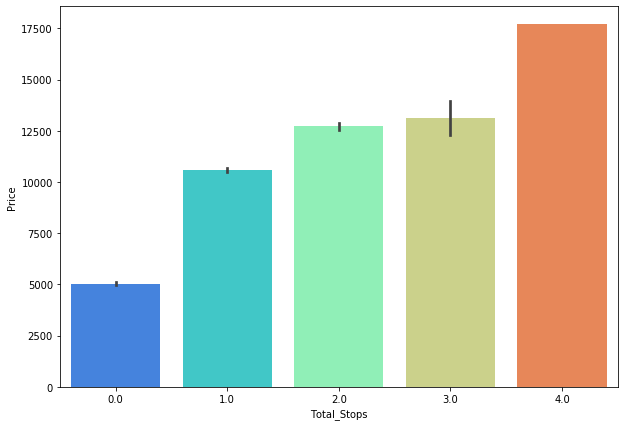

In [41]:
# plotting bar plot of number of stops vs the price
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Total_Stops',y='Price',data=data_a,palette='rainbow')

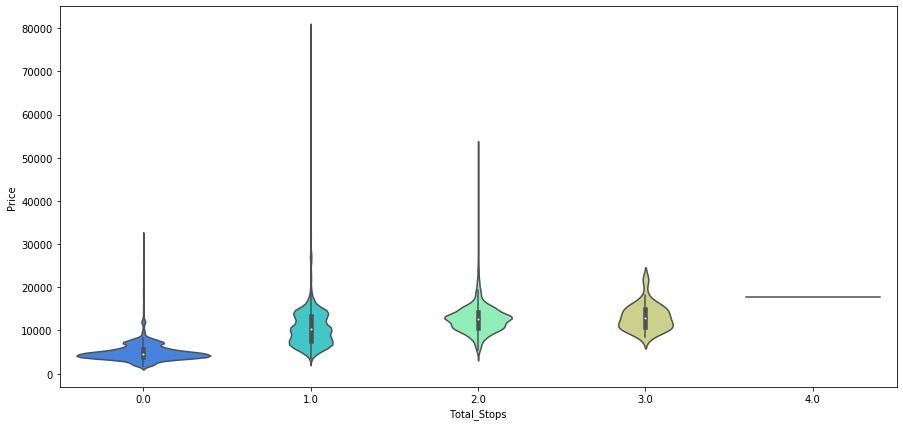

In [42]:
figure = (15,7)
fig, ax = plt.subplots(figsize=figure)
sns.violinplot(x='Total_Stops',y='Price',data=data_a,palette='rainbow')


## Implementing Algorithm

In [43]:
data_a.head(15)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arr_hr,Arr_min,Duration_hours,Duration_mins,0,0,0
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,3.0,0.0,5.0
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0,3.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,4.0,2.0,1.0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,3.0,3.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,3.0,0.0,5.0
5,SpiceJet,Kolkata,Banglore,0.0,3873.0,24.0,6.0,9.0,0.0,11.0,25.0,2.0,25.0,8.0,3.0,0.0
6,Jet Airways,Banglore,New Delhi,1.0,11087.0,12.0,3.0,18.0,55.0,10.0,25.0,15.0,30.0,4.0,0.0,5.0
7,Jet Airways,Banglore,New Delhi,1.0,22270.0,1.0,3.0,8.0,0.0,5.0,5.0,21.0,5.0,4.0,0.0,5.0
8,Jet Airways,Banglore,New Delhi,1.0,11087.0,12.0,3.0,8.0,55.0,10.0,25.0,25.0,30.0,4.0,0.0,5.0
9,Multiple carriers,Delhi,Cochin,1.0,8625.0,27.0,5.0,11.0,25.0,19.0,15.0,7.0,50.0,6.0,2.0,1.0


In [46]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10682 non-null  object 
 1   Source          10682 non-null  object 
 2   Destination     10682 non-null  object 
 3   Total_Stops     10682 non-null  float64
 4   Price           10682 non-null  float64
 5   Journey_day     10682 non-null  float64
 6   Journey_month   10682 non-null  float64
 7   Departure_hour  10682 non-null  float64
 8   Departure_min   10682 non-null  float64
 9   Arr_hr          10682 non-null  float64
 10  Arr_min         10682 non-null  float64
 11  Duration_hours  10682 non-null  float64
 12  Duration_mins   10682 non-null  float64
 13  0               10682 non-null  float64
 14  0               10682 non-null  float64
 15  0               10682 non-null  float64
dtypes: float64(13), object(3)
memory usage: 1.7+ MB
